## Graphs & Networks

applications of linear algebra

"real" linear algebra (or linear alegbra for the real world) uses
matrices coming from somewhere

the most important model in the applied mathematics


### Graphs

nodes and edges


(-0.5, 2.0)

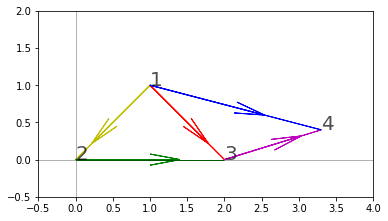

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

import random
import numpy as np

# x, y, text
node1 = [1, 1, '1']
node2 = [0, 0, '2']
node3 = [2, 0, '3']
node4 = [3.3, 0.4, '4']

random.seed(42)
colors = list('rgbcmyk')
def rand_color():
    c = random.choice(colors)
    colors.remove(c)
    return c

fromTos = [
    # from, to, edge weight
    (node1, node2, None),
    (node1, node3, None),
    (node2, node3, None),
    (node3, node4, None),
    (node1, node4, None),
]

# quiver()
# X, Y, U, V = zip(*verts)
# plt.quiver(
#     X, Y, U, V, 
#     angles='xy', color=['r', 'g', 'b', 'c', 'm', 'y', 'k'], 
#     scale_units='xy', scale=1)

# arrow() can do
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/arrow_demo.html#sphx-glr-gallery-text-labels-and-annotations-arrow-demo-py
for n in (node1, node2, node3, node4):
    plt.annotate(n[2], n[:2], size=20, alpha=0.7)
    
for fr, to, w in fromTos:
    vert = [fr[0], fr[1], to[0] - fr[0], to[1] - fr[1]]
    half = [vert[0], vert[1], vert[2] / 2.0, vert[3] / 2.0]
    c = rand_color()
    plt.arrow(
        *half, 
        head_width=0.15,
        head_length=0.4,
        overhang=1.0,
        color=c,
    )
    plt.arrow(
        *vert, 
        head_width=0,
        head_length=0,
        length_includes_head=True,
        overhang=1.0,
        color=c,
    )

ax = plt.gca()
ax.set_aspect(1.0)
plt.axhline(0, color='black', linewidth=1, alpha=0.3)
plt.axvline(0, color='black', linewidth=1, alpha=0.3)
plt.xlim(-0.5, 4)
plt.ylim(-0.5, 2)

in the above case I have $n = 4$, which is the number of nodes;

$m = 5$ which is the number of edges;

$A_{m \ \times \ n}$ represents the graph 

edges are directional